<a href="https://colab.research.google.com/github/neet813/Stock_analysis/blob/main/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter stock ticker (e.g., AAPL, MSFT, TSLA): EURUSD=X


STOCK ANALYSIS: EURUSD=X

Current Price: $1.16
Today's Change: $0.00 (0.03%)

Last 7 Days:
  Highest: $1.16
  Lowest: $1.15

Last 30 Days:
  Highest: $1.17
  Lowest: $1.15

All-Time (in last year):
  Highest: $1.19
  Lowest: $1.02

Resistance Level: $1.19 (2.30% away)
Support Level: $1.02 (11.72% away)

Volume data unavailable — skipping volume analysis.

Trend: UPTREND - Moderate
  20-Day Moving Avg: $1.16
  50-Day Moving Avg: $1.16

Volatility (daily change %): 0.51%
Volatility Level: LOW - Stable



/tmp/ipython-input-173267639.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(ticker, period="1y", progress=False)


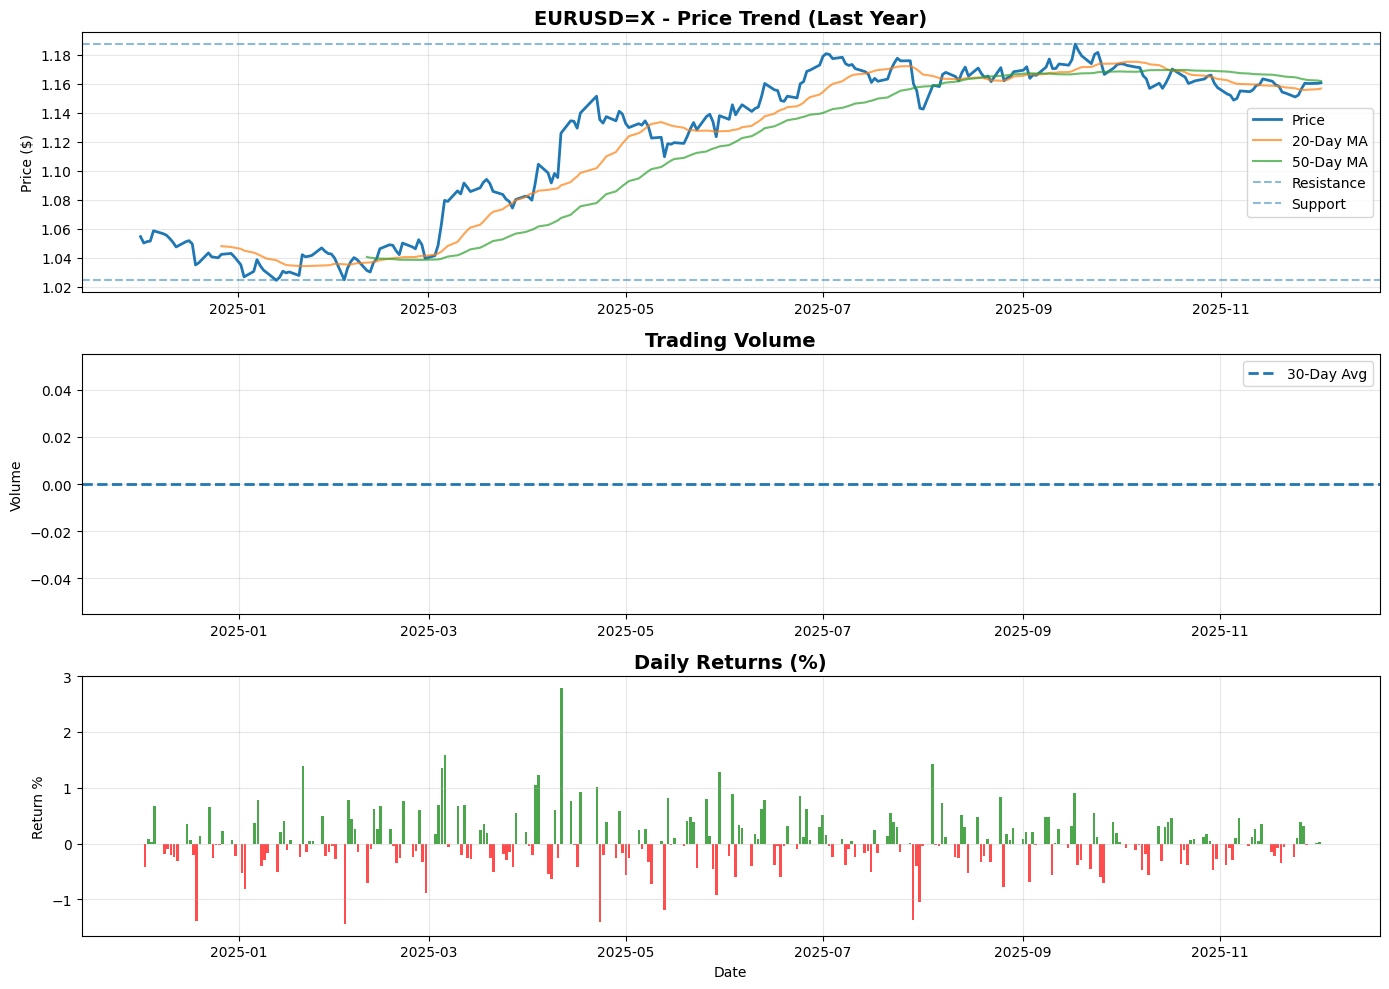

In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Input: Stock ticker
ticker = input("Enter stock ticker (e.g., AAPL, MSFT, TSLA): ").upper()

# Download stock data (last 1 year)
print(f"\nDownloading data for {ticker}...")
stock = yf.Ticker(ticker)
hist = yf.download(ticker, period="1y", progress=False)
# Clean Volume column
# Normalize data format
if isinstance(hist, pd.Series):
    hist = hist.to_frame()

# If multi-index columns (e.g., ('Close', 'AAPL')), flatten them
if isinstance(hist.columns, pd.MultiIndex):
    hist.columns = [c[0] if isinstance(c, tuple) else c for c in hist.columns]

# If only one column exists, force it to be named 'Close'
if len(hist.columns) == 1:
    hist.columns = ['Close']

# If Volume is missing, create a dummy Volume column
if 'Volume' not in hist.columns:
    hist['Volume'] = np.nan  # or 0



# Handle different data formats
if isinstance(hist, pd.Series):
    hist = hist.to_frame()
if 'Close' not in hist.columns:
    hist.columns = ['Close']

# Basic info
print(f"\n{'='*60}")
print(f"STOCK ANALYSIS: {ticker}")
print(f"{'='*60}\n")

# 1. Current Price
current_price = float(hist['Close'].iloc[-1])
print(f"Current Price: ${current_price:.2f}")

# 2. Price Change (today vs yesterday)
price_change = current_price - float(hist['Close'].iloc[-2])
pct_change = (price_change / float(hist['Close'].iloc[-2])) * 100
print(f"Today's Change: ${price_change:.2f} ({pct_change:.2f}%)\n")

# 3. Highest & Lowest in Last 1 Week
week_ago = hist.tail(7)
week_high = float(week_ago['Close'].max())
week_low = float(week_ago['Close'].min())
print(f"Last 7 Days:")
print(f"  Highest: ${week_high:.2f}")
print(f"  Lowest: ${week_low:.2f}\n")

# 4. Highest & Lowest in Last 1 Month
month_ago = hist.tail(30)
month_high = float(month_ago['Close'].max())
month_low = float(month_ago['Close'].min())
print(f"Last 30 Days:")
print(f"  Highest: ${month_high:.2f}")
print(f"  Lowest: ${month_low:.2f}\n")

# 5. Support & Resistance Levels
all_time_high = float(hist['Close'].max())
all_time_low = float(hist['Close'].min())
print(f"All-Time (in last year):")
print(f"  Highest: ${all_time_high:.2f}")
print(f"  Lowest: ${all_time_low:.2f}")

# Check if near resistance/support
resistance = all_time_high
support = all_time_low
distance_to_resistance = ((resistance - current_price) / current_price) * 100
distance_to_support = ((current_price - support) / current_price) * 100

print(f"\nResistance Level: ${resistance:.2f} ({distance_to_resistance:.2f}% away)")
print(f"Support Level: ${support:.2f} ({distance_to_support:.2f}% away)\n")

# 6. Volume Analysis
# 6. Volume Analysis (safe)
current_volume = float(hist['Volume'].iloc[-1])
avg_volume = float(hist['Volume'].tail(30).mean())

# Avoid divide-by-zero
if avg_volume == 0 or np.isnan(avg_volume):
    print("Volume data unavailable — skipping volume analysis.\n")
    volume_change = 0
else:
    volume_change = ((current_volume - avg_volume) / avg_volume) * 100
    print(f"Volume:")
    print(f"  Current: {current_volume:,.0f}")
    print(f"  30-Day Average: {avg_volume:,.0f}")
    print(f"  Change: {volume_change:+.2f}%\n")


# 7. Trend Analysis
hist_copy = hist.copy()
hist_copy['MA_20'] = hist_copy['Close'].rolling(window=20).mean()
hist_copy['MA_50'] = hist_copy['Close'].rolling(window=50).mean()

trend_20 = float(hist_copy['MA_20'].iloc[-1])
trend_50 = float(hist_copy['MA_50'].iloc[-1])

if current_price > trend_20 > trend_50:
    trend = "UPTREND - Strong"
elif current_price > trend_20:
    trend = "UPTREND - Moderate"
elif current_price < trend_20 < trend_50:
    trend = "DOWNTREND - Strong"
else:
    trend = "NEUTRAL/MIXED"

print(f"Trend: {trend}")
print(f"  20-Day Moving Avg: ${trend_20:.2f}")
print(f"  50-Day Moving Avg: ${trend_50:.2f}\n")

# 8. Volatility (simple standard deviation)
volatility = float(hist['Close'].pct_change().std() * 100)
print(f"Volatility (daily change %): {volatility:.2f}%")
if volatility < 2:
    vol_text = "LOW - Stable"
elif volatility < 4:
    vol_text = "MODERATE - Normal"
else:
    vol_text = "HIGH - Risky"
print(f"Volatility Level: {vol_text}\n")

# VISUALIZATION
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Prepare data
dates = hist.index
closes = hist['Close']
volumes = hist['Volume']
daily_returns = hist['Close'].pct_change().fillna(0) * 100

ma_20 = hist_copy['MA_20']
ma_50 = hist_copy['MA_50']

# Chart 1: Price with Moving Averages
axes[0].plot(dates, closes, label='Price', linewidth=2)
axes[0].plot(dates, ma_20, label='20-Day MA', alpha=0.7)
axes[0].plot(dates, ma_50, label='50-Day MA', alpha=0.7)
axes[0].axhline(y=resistance, linestyle='--', label='Resistance', alpha=0.5)
axes[0].axhline(y=support, linestyle='--', label='Support', alpha=0.5)
axes[0].set_title(f'{ticker} - Price Trend (Last Year)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Chart 2: Volume
colors = ['green' if v > avg_volume else 'steelblue' for v in volumes]
axes[1].bar(dates, volumes, color=colors, alpha=0.7)
axes[1].axhline(y=avg_volume, linestyle='--', label='30-Day Avg', linewidth=2)
axes[1].set_title('Trading Volume', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Volume')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Chart 3: Daily Returns
colors = ['green' if r > 0 else 'red' for r in daily_returns]
axes[2].bar(dates, daily_returns, color=colors, alpha=0.7)
axes[2].set_title('Daily Returns (%)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Return %')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
